In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
order_items = pd.read_csv("../data/relational/order_items.csv")
order_items.head()

,order_item_id,order_id,customer_id,product_id,product_quantity
0,1,ORD493666,ID0844489306,5667303310202,1
1,2,ORD493666,ID0844489306,5601667425486,2
2,3,ORD493666,ID0844489306,1817516002164,2
3,4,ORD129378,ID6167417934,3453269640826,1
4,5,ORD129378,ID6167417934,8627546160887,2


In [15]:
order_items.shape

(2991, 5)

In [7]:
orders = pd.read_csv("../data/relational/orders.csv")
orders.head()

,order_id,customer_id,date,is_expedited_delivery,nearest_warehouse_id,distance_to_nearest_warehouse,order_price,delivery_charges,coupon_discount,order_total
0,ORD493666,ID0844489306,01 27 2019,False,MELBTHOM,0.9039,18300.0,74.75,0,18374.75
1,ORD129378,ID6167417934,02 03 2019,True,MELBNICK,0.9127,8125.0,80.74,10,7393.24
2,ORD455246,ID4326586172,02-24-2019,False,MELBTHOM,1.6071,20985.0,81.66,15,17918.91
3,ORD497096,ID4735909071,03 10 2019,True,MELBTHOM,0.9663,16980.0,103.77,5,16234.77
4,ORD414419,ID0207085738,03 29 2019,True,MELBBAKE,1.8081,6460.0,81.31,5,6218.31


<AxesSubplot:xlabel='order_price', ylabel='Frequency'>

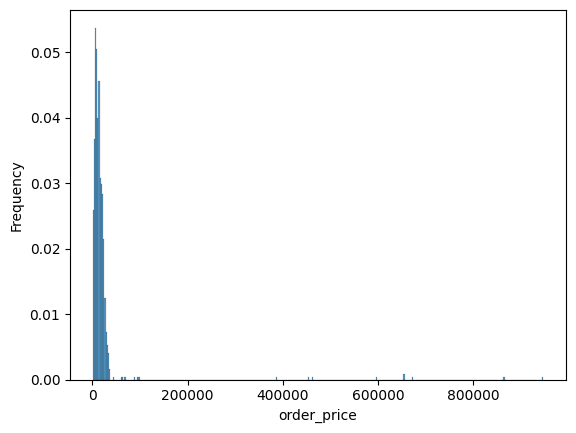

In [118]:
sns.histplot(orders["order_price"], stat="frequency")

In [43]:
orders.shape

(1000, 10)

In [30]:
orders_short = orders[
    [
        "order_id",
        "customer_id",
        "order_price",
        "delivery_charges",
        "coupon_discount",
        "order_total",
    ]
]

In [11]:
products = pd.read_csv("../data/relational/products.csv")
products

,product_id,product_name
0,1817516002164,Iassist Line
1,5033789888489,Alcon 10
2,2832965681981,Thunder Line
3,3453269640826,Olivia X460
4,5601667425486,Peartv
5,5216491962641,Candle Inferno
6,4075780128516,Istream
7,9028783813533,Toshika 750
8,8627546160887,Universe Note
9,5667303310202,Lucent 330S


In [42]:
order_items.groupby(["order_id", "product_id"])["product_quantity"].sum().reset_index()

,order_id,product_id,product_quantity
0,ORD000459,5033789888489,2
1,ORD000459,5216491962641,1
2,ORD000459,5601667425486,1
3,ORD000459,5667303310202,1
4,ORD001041,1817516002164,1
...,...,...,...
2986,ORD498853,4075780128516,1
2987,ORD499540,2832965681981,2
2988,ORD499540,3453269640826,1
2989,ORD499540,4075780128516,1


In [32]:
orders_short

,order_id,customer_id,order_price,delivery_charges,coupon_discount,order_total
0,ORD493666,ID0844489306,18300.0,74.75,0,18374.75
1,ORD129378,ID6167417934,8125.0,80.74,10,7393.24
2,ORD455246,ID4326586172,20985.0,81.66,15,17918.91
3,ORD497096,ID4735909071,16980.0,103.77,5,16234.77
4,ORD414419,ID0207085738,6460.0,81.31,5,6218.31
...,...,...,...,...,...,...
995,ORD182419,ID0595857779,15710.0,74.14,15,13427.64
996,ORD116440,ID0332546017,947691.0,90.82,10,9266.32
997,ORD229269,ID0582156569,21805.0,97.96,25,16451.71
998,ORD032042,ID1725216340,5740.0,68.30,0,5808.30


In [113]:
shopping_cart = pd.read_csv("../data/raw/original_data.csv")[
    ["order_id", "shopping_cart", "order_price"]
]
shopping_cart

,order_id,shopping_cart,order_price
0,ORD493666,"[('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...",18300.0
1,ORD129378,"[('Olivia x460', 1), ('Universe Note', 2)]",8125.0
2,ORD455246,"[('iAssist Line', 1), ('Alcon 10', 2), ('Candl...",20985.0
3,ORD497096,"[('pearTV', 2), ('Thunder line', 2)]",16980.0
4,ORD414419,"[('iStream', 1), ('pearTV', 1)]",6460.0
...,...,...,...
995,ORD182419,"[('Universe Note', 2), ('Thunder line', 2), ('...",15710.0
996,ORD116440,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0
997,ORD229269,"[('Alcon 10', 1), ('pearTV', 1), ('iAssist Lin...",21805.0
998,ORD032042,"[('LUCENT 330S', 1), ('THUNDER LINE', 2), ('IS...",5740.0


In [37]:
shopping_cart["shopping_cart"]

0      [('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...
1             [('Olivia x460', 1), ('Universe Note', 2)]
2      [('iAssist Line', 1), ('Alcon 10', 2), ('Candl...
3                   [('pearTV', 2), ('Thunder line', 2)]
4                        [('iStream', 1), ('pearTV', 1)]
                             ...                        
995    [('Universe Note', 2), ('Thunder line', 2), ('...
996    [('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...
997    [('Alcon 10', 1), ('pearTV', 1), ('iAssist Lin...
998    [('LUCENT 330S', 1), ('THUNDER LINE', 2), ('IS...
999    [('Thunder line', 2), ('iStream', 1), ('Candle...
Name: shopping_cart, Length: 1000, dtype: object

In [53]:
order_items_pivot = pd.pivot_table(
    data=order_items, columns="product_id", index="order_id"
)["product_quantity"].replace(np.nan, 0)

order_items_pivot = order_items_pivot.reset_index().loc[:, "order_id":]
order_items_pivot

product_id,order_id,1817516002164,2832965681981,3453269640826,4075780128516,5033789888489,5216491962641,5601667425486,5667303310202,8627546160887,9028783813533
0,ORD000459,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
1,ORD001041,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ORD003106,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,ORD004228,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,ORD004262,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
995,ORD498207,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
996,ORD498344,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
997,ORD498590,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,ORD498853,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
product_qtty_matrix = np.array(order_items_pivot.iloc[:, 1:])
product_qtty_matrix

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.8300e+04],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        8.1250e+03],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        2.0985e+04],
       ...,
       [2.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.1805e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.7400e+03],
       [0.0000e+00, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.3700e+03]])

In [70]:
order_price_list = np.array(orders["order_price"])
order_price_list

array([1.83000e+04, 8.12500e+03, 2.09850e+04, 1.69800e+04, 6.46000e+03,
       8.49000e+03, 2.21200e+04, 2.51050e+04, 2.34500e+04, 3.52050e+04,
       1.11000e+04, 8.95000e+03, 1.42600e+04, 3.11100e+04, 1.72600e+04,
       5.70000e+03, 8.13500e+03, 2.31800e+04, 2.30800e+04, 5.18000e+03,
       1.07600e+04, 1.01750e+04, 2.16200e+04, 5.89000e+03, 6.54500e+03,
       1.26900e+04, 4.40500e+03, 2.33000e+03, 2.24400e+04, 2.24900e+04,
       4.91000e+03, 2.09000e+03, 1.32700e+04, 2.05200e+04, 8.79000e+03,
       1.66150e+04, 1.60700e+04, 1.43900e+04, 1.23600e+04, 4.40500e+03,
       1.49500e+04, 9.20000e+03, 6.75000e+03, 8.77000e+03, 1.44200e+04,
       4.91000e+03, 1.72400e+04, 6.74000e+03, 6.86500e+03, 1.96650e+04,
       1.95950e+04, 1.61800e+04, 2.48000e+04, 1.09400e+04, 9.63850e+04,
       8.07000e+03, 1.31300e+04, 1.22200e+04, 1.46850e+04, 1.95200e+04,
       1.38200e+04, 1.91600e+04, 2.38800e+04, 1.58400e+04, 1.20900e+04,
       2.86600e+04, 1.16500e+04, 5.22000e+03, 1.08200e+04, 8.490

In [73]:
order_items_pivot["order_price"] = order_price_list

In [81]:
order_items_pivot_wo_nan = order_items_pivot.dropna(subset="order_price")
orders_prices_array = order_items_pivot_wo_nan["order_price"]
order_items_pivot_wo_nan = order_items_pivot_wo_nan.loc[:, 1817516002164:9028783813533]
product_qtty_matrix = np.array(order_items_pivot_wo_nan)
product_qtty_matrix

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 2.],
       ...,
       [2., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.]])

In [94]:
orders_prices_array = np.array(orders_prices_array)
y = orders_prices_array.reshape(-1, 1)
y

array([[1.83000e+04],
       [8.12500e+03],
       [2.09850e+04],
       [1.69800e+04],
       [6.46000e+03],
       [8.49000e+03],
       [2.21200e+04],
       [2.51050e+04],
       [2.34500e+04],
       [3.52050e+04],
       [1.11000e+04],
       [8.95000e+03],
       [1.42600e+04],
       [3.11100e+04],
       [1.72600e+04],
       [5.70000e+03],
       [8.13500e+03],
       [2.31800e+04],
       [2.30800e+04],
       [5.18000e+03],
       [1.07600e+04],
       [1.01750e+04],
       [2.16200e+04],
       [5.89000e+03],
       [6.54500e+03],
       [1.26900e+04],
       [4.40500e+03],
       [2.33000e+03],
       [2.24400e+04],
       [2.24900e+04],
       [4.91000e+03],
       [2.09000e+03],
       [1.32700e+04],
       [2.05200e+04],
       [8.79000e+03],
       [1.66150e+04],
       [1.60700e+04],
       [1.43900e+04],
       [1.23600e+04],
       [4.40500e+03],
       [1.49500e+04],
       [9.20000e+03],
       [6.75000e+03],
       [8.77000e+03],
       [1.44200e+04],
       [4.

In [96]:
X = product_qtty_matrix
X_inv = np.linalg.inv(X)

LinAlgError: Last 2 dimensions of the array must be square

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [108]:
X_res = np.eye(10)

In [129]:
product_prices = lr.predict(X_res)

,order_item_id,order_id,customer_id,product_id,product_quantity
0,1,ORD493666,ID0844489306,5667303310202,1
1,2,ORD493666,ID0844489306,5601667425486,2
2,3,ORD493666,ID0844489306,1817516002164,2
3,4,ORD129378,ID6167417934,3453269640826,1
4,5,ORD129378,ID6167417934,8627546160887,2
...,...,...,...,...,...
2986,2987,ORD032042,ID1725216340,2832965681981,2
2987,2988,ORD032042,ID1725216340,4075780128516,1
2988,2989,ORD227618,ID0571730335,2832965681981,2
2989,2990,ORD227618,ID0571730335,4075780128516,1


In [128]:
product_ids_list = order_items_pivot.columns[1:-1].to_list()

In [142]:
products_prices_dict = dict(zip(product_ids_list, product_prices.T[0]))

In [145]:
order_items["product_price"] = order_items["product_id"].map(products_prices_dict)

In [146]:
order_items

,order_item_id,order_id,customer_id,product_id,product_quantity,product_price
0,1,ORD493666,ID0844489306,5667303310202,1,13460.755398
1,2,ORD493666,ID0844489306,5601667425486,2,9560.541618
2,3,ORD493666,ID0844489306,1817516002164,2,11744.425752
3,4,ORD129378,ID6167417934,3453269640826,1,13166.453895
4,5,ORD129378,ID6167417934,8627546160887,2,14254.955210
...,...,...,...,...,...,...
2986,2987,ORD032042,ID1725216340,2832965681981,2,16695.038688
2987,2988,ORD032042,ID1725216340,4075780128516,1,17411.745534
2988,2989,ORD227618,ID0571730335,2832965681981,2,16695.038688
2989,2990,ORD227618,ID0571730335,4075780128516,1,17411.745534


<AxesSubplot:xlabel='product_price', ylabel='Count'>

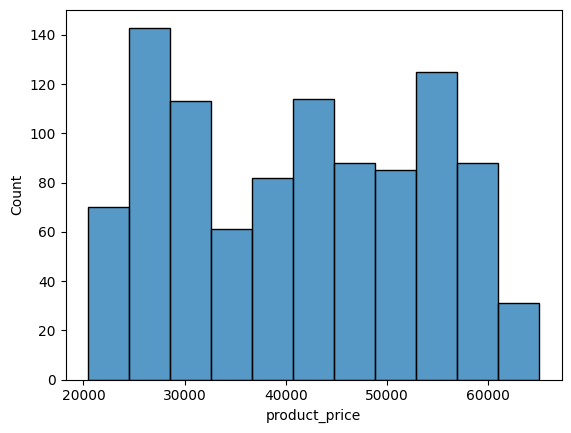

In [151]:
sns.histplot(order_items.groupby("order_id").sum()["product_price"])

In [152]:
orders[']

,order_id,customer_id,date,is_expedited_delivery,nearest_warehouse_id,distance_to_nearest_warehouse,order_price,delivery_charges,coupon_discount,order_total
0,ORD493666,ID0844489306,01 27 2019,False,MELBTHOM,0.9039,18300.0,74.75,0,18374.75
1,ORD129378,ID6167417934,02 03 2019,True,MELBNICK,0.9127,8125.0,80.74,10,7393.24
2,ORD455246,ID4326586172,02-24-2019,False,MELBTHOM,1.6071,20985.0,81.66,15,17918.91
3,ORD497096,ID4735909071,03 10 2019,True,MELBTHOM,0.9663,16980.0,103.77,5,16234.77
4,ORD414419,ID0207085738,03 29 2019,True,MELBBAKE,1.8081,6460.0,81.31,5,6218.31
...,...,...,...,...,...,...,...,...,...,...
995,ORD182419,ID0595857779,2019-12-30,False,MELBNICK,1.0928,15710.0,74.14,15,13427.64
996,ORD116440,ID0332546017,2019-12-31,True,MELBTHOM,0.4187,947691.0,90.82,10,9266.32
997,ORD229269,ID0582156569,2019-12-31,False,NaN,3.1388,21805.0,97.96,25,16451.71
998,ORD032042,ID1725216340,2019-12-31,False,MELBTHOM,1.8197,5740.0,68.30,0,5808.30
